<a href="https://colab.research.google.com/github/MuhammedIrfan-tech/guess-Number/blob/main/eda_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv('flipkart.csv')

In [3]:
#basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   OrderID          100 non-null    int64 
 1   Date             100 non-null    object
 2   ProductCategory  100 non-null    object
 3   ProductName      100 non-null    object
 4   Quantity         100 non-null    int64 
 5   PricePerUnit     100 non-null    int64 
 6   TotalAmount      100 non-null    int64 
 7   CustomerCity     100 non-null    object
 8   PaymentMethod    100 non-null    object
dtypes: int64(4), object(5)
memory usage: 7.2+ KB


In [4]:
#basic statistical information
data[['Quantity','PricePerUnit', 'TotalAmount']].describe()

,Quantity,PricePerUnit,TotalAmount
count,100.00000,100.00000,100.000000
mean,1.40000,8475.00000,9794.500000
std,0.68165,11547.78325,12294.216377
min,1.00000,300.00000,300.000000
25%,1.00000,700.00000,1200.000000
50%,1.00000,3500.00000,3650.000000
75%,2.00000,12125.00000,15625.000000
max,4.00000,50000.00000,50000.000000


In [5]:
#check any null values contains
data.isna().sum()

,0
OrderID,0
Date,0
ProductCategory,0
ProductName,0
Quantity,0
PricePerUnit,0
TotalAmount,0
CustomerCity,0
PaymentMethod,0


In [6]:
#change the datatype
data[ 'Date'] =  pd.to_datetime(data['Date'])

In [7]:
#find the which city has highest sales
data['CustomerCity'].max()

'Pune'

In [8]:
#analyse how much quantity buys in each city
city_quantity = data.groupby('CustomerCity')['Quantity'].sum()
city_quantity

,Quantity
CustomerCity,
Ahmedabad,15
Bangalore,23
Chennai,12
Delhi,17
Hyderabad,26
Kolkata,20
Mumbai,13
Pune,14


In [9]:
#analyse month and total amount got
data['month'] = data['Date'].dt.month
data_month=data.groupby('month')['TotalAmount'].sum().reset_index()
data_month

,month,TotalAmount
0,1,76900
1,2,107600
2,3,114890
3,4,119420
4,5,94420
5,6,373120
6,12,93100


In [10]:
#analyse how much of products counts
data_product=data['ProductName'].value_counts()
data_product

,count
ProductName,
Smartphone,6
T-shirt,6
Air Purifier,5
Fiction Novel,5
Wireless Earbuds,5
Jeans,5
Microwave Oven,5
Self-help Book,5
Laptop,5


In [11]:
#analyse product with total amount
product_amt = data.groupby('ProductName').agg({'TotalAmount':'mean'}).reset_index()
product_amt

,ProductName,TotalAmount
0,Air Purifier,10280.0
1,Biography,778.0
2,Cap,1112.0
3,Cookbook,955.0
4,Fiction Novel,504.0
5,Jacket,3700.0
6,Jeans,2400.0
7,Laptop,47800.0
8,Microwave Oven,7280.0
9,Refrigerator,26400.0


In [12]:
#count the frequency of  each payment method
payment_data = data['PaymentMethod'].value_counts().reset_index()
payment_data

,PaymentMethod,count
0,Credit Card,26
1,UPI,26
2,Cash on Delivery,24
3,Debit Card,24


# Visualization

Text(0, 0.5, 'Total Amount')

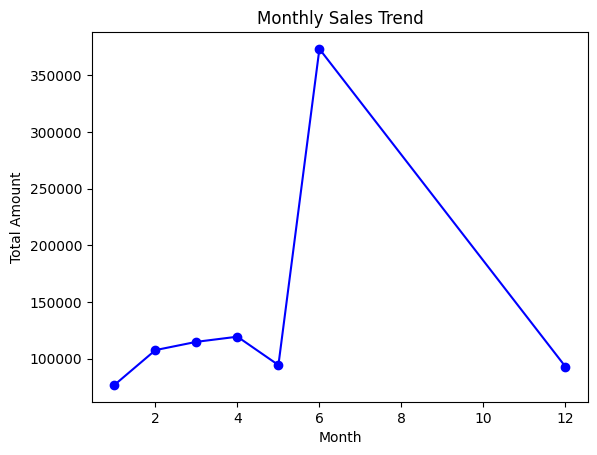

In [13]:
#analyse the sales monthly change
plt.plot(data_month['month'],data_month['TotalAmount'],color='blue',marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Amount')

Text(0, 0.5, 'Amount')

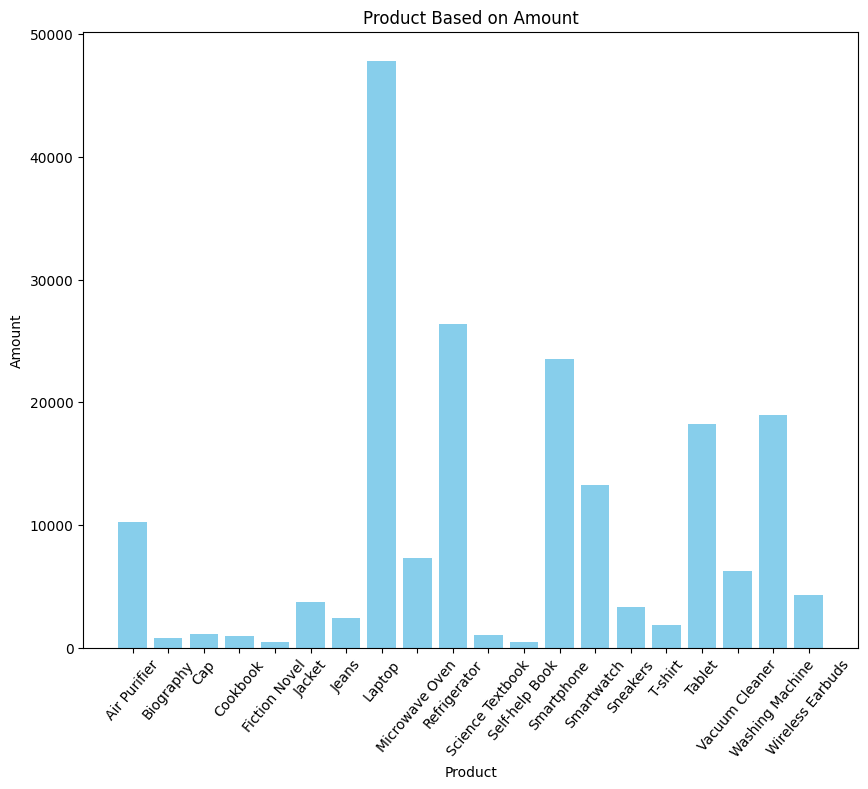

In [14]:
#analyse product with amount
plt.figure(figsize=(10,8))
plt.bar(product_amt['ProductName'],product_amt['TotalAmount'],color='skyblue')
plt.xticks(rotation=50)
plt.title('Product Based on Amount')
plt.xlabel('Product')
plt.ylabel('Amount')

Text(0.5, 1.0, 'Payment Methods')

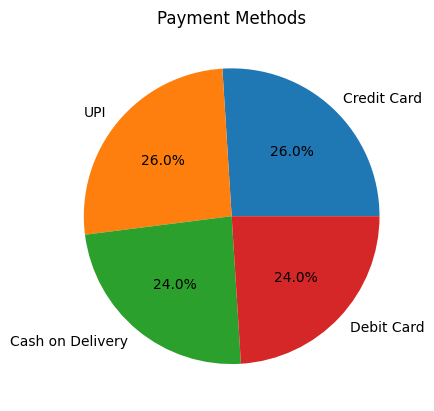

In [15]:
#payment using piechart
plt.pie(payment_data['count'],labels=payment_data['PaymentMethod'],autopct='%1.1f%%')
plt.title('Payment Methods')